Name: Mariam Valladares

Labpartner(s): Sarah Brannum

In [1]:
#import statements go here
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

**For today's lab you need to install the package cartopy**

In [2]:
import cartopy.crs as ccrs   #import map styles/types
import cartopy.feature as cfeature  # features such as the ocean, coastlines rivers, etc
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

# Class 6.2

Today we will finish fiunction sharing and do more plotting

# Warmups 6.2

**W.1** (From Zach) Write some code that generates 15 random integers from 1-100. If the integers are divisible by 2 assign them to list "x" if they are divisible by three, assign them to list "y", if they are neither assign them to list "z". 

In [4]:
random = np.random.randint(10, size = 100)
random

array([2, 9, 1, 3, 1, 4, 1, 7, 5, 8, 5, 0, 2, 4, 8, 4, 6, 5, 1, 6, 0, 7,
       6, 6, 0, 3, 6, 0, 4, 5, 9, 0, 2, 3, 9, 4, 0, 4, 8, 3, 9, 7, 6, 6,
       5, 5, 4, 2, 8, 7, 0, 3, 2, 3, 2, 6, 3, 9, 0, 5, 1, 1, 3, 1, 9, 0,
       3, 1, 2, 2, 0, 6, 6, 8, 8, 9, 6, 6, 1, 1, 6, 5, 7, 2, 1, 0, 7, 4,
       5, 0, 8, 7, 5, 8, 0, 0, 0, 2, 9, 9])

In [5]:
x = []
y = []
z = []

for i in random:
    if i % 2 == 0:
        x.append(i)
    elif i % 3 == 0:
        y.append(i)
    else:
        z.append(i)

print(x)
print(y)
print(z)


[2, 4, 8, 0, 2, 4, 8, 4, 6, 6, 0, 6, 6, 0, 6, 0, 4, 0, 2, 4, 0, 4, 8, 6, 6, 4, 2, 8, 0, 2, 2, 6, 0, 0, 2, 2, 0, 6, 6, 8, 8, 6, 6, 6, 2, 0, 4, 0, 8, 8, 0, 0, 0, 2]
[9, 3, 3, 9, 3, 9, 3, 9, 3, 3, 3, 9, 3, 9, 3, 9, 9, 9]
[1, 1, 1, 7, 5, 5, 5, 1, 7, 5, 7, 5, 5, 7, 5, 1, 1, 1, 1, 1, 1, 5, 7, 1, 7, 5, 7, 5]


**W.2** Plot your lists together in some sensible way. Zach suggests a histogram with different colors for each list

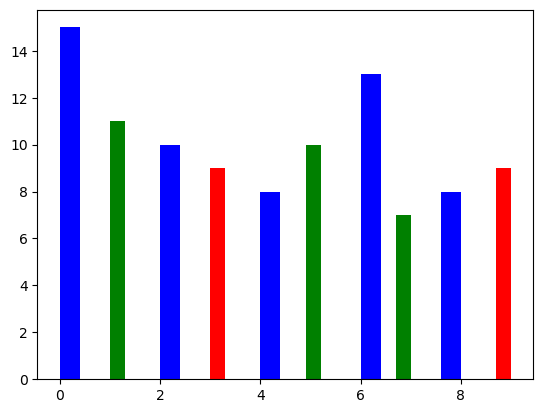

In [9]:
x = np.array(x)
y = np.array(y)
z = np.array(z)


fig, ax = plt.subplots()
ax.hist(x,bins = 20, color = 'blue')
ax.hist(y, bins = 20, color = 'red')
ax.hist(z,bins = 20,  color = 'green')

plt.show()

# Lecture 6.2

### Agenda:

- Show us your functions
- Questions
- xarray package and plotting netcdf files


### Show us your functions (from Lab 5.2) - continued

### Questions

### Cartopy

Let's take the data we used last time and make the plot publication ready

There are a number of differnt map projections available in Cartopy.  https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


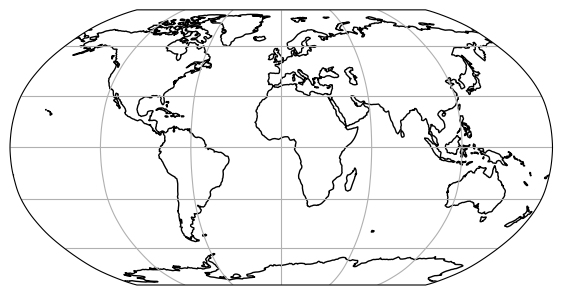

In [10]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson())
ax.coastlines(resolution='110m')
ax.gridlines()

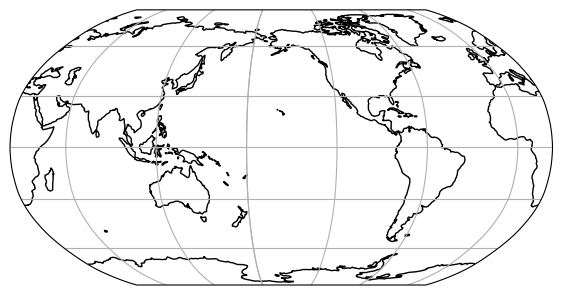

In [11]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 203)) # this rotates the map to 203 degrees East
ax.coastlines(resolution='110m')
ax.gridlines()

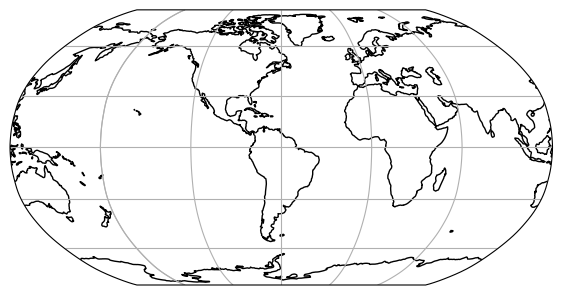

In [12]:
# plot a basic map with no data, rotated
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude = 300)) # or -60
ax.coastlines(resolution='110m')
ax.gridlines()

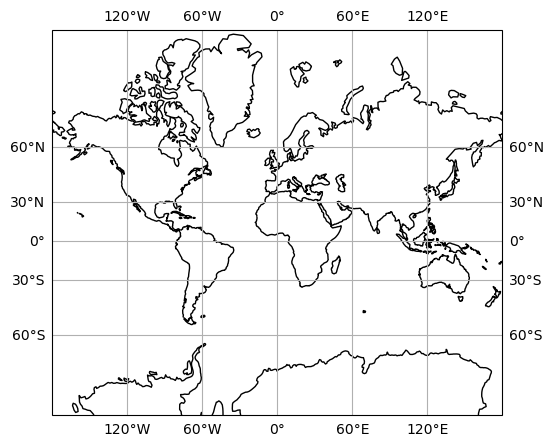

In [13]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.Mercator()) # different map projection
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True) ##add the labels of lat long
# note this has grid labels, this is being updated for all projections in the latest version of cartopy 0.18.0

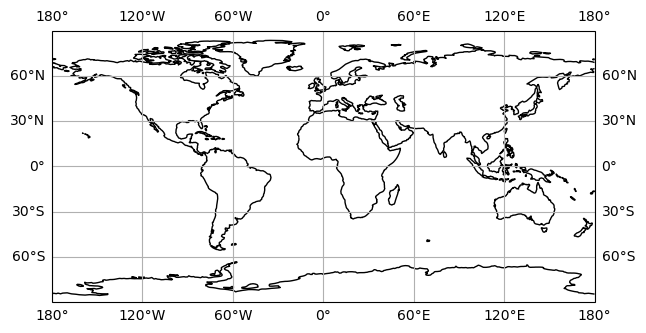

In [14]:
# plot a basic map with no data
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

# -60 (60 W) is the same as 300 E (360 degrees in total 360-60W = 300E)

How do I zoom in?

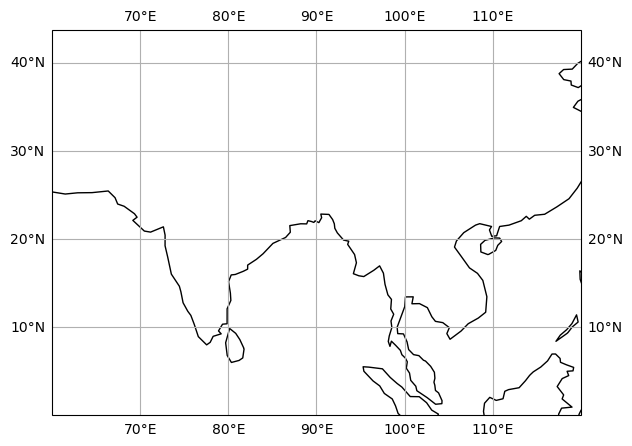

In [15]:
# let's zoom in to S Asia
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([60, 120, 0, 40]) # set the limits of the plot and allows to zoom in (limits minx max x and min y and max y)
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)


**Moving back to the Gulf of Mexico, we want to set the lat and lon range to match our HYCOM data. How do we find this?**

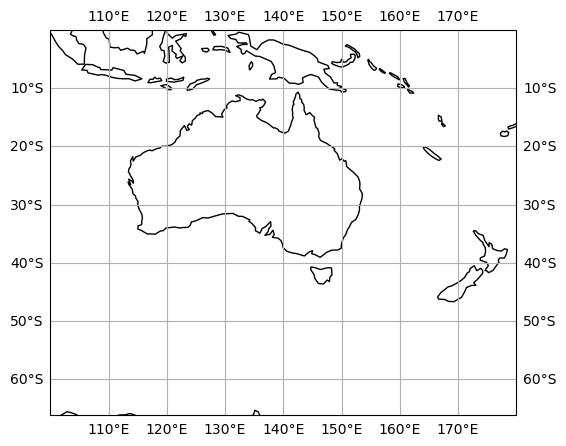

In [17]:
# let's zoom in to Australia
plt.figure(figsize=(7, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([100,180, 0, -60]) # long and then lat, set the limits of the plot and allows to zoom in (limits minx max x and min y and max y)
ax.coastlines(resolution='110m')
ax.gridlines(draw_labels=True)

In [19]:
#insert path or url to file here (using my birthday)
file = "http://tds.hycom.org/thredds/dodsC/datasets/GOMb0.04/reanalysis/data/2019/031_archv.2019_198_00_3z.nc"

In [20]:
gom_data = xr.open_dataset(file, decode_times=False)

In [21]:
gom_data

<xarray.Dataset>
Dimensions:     (Longitude: 525, Latitude: 385, Depth: 40, MT: 1)
Coordinates:
  * Longitude   (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude    (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Depth       (Depth) float32 0.0 2.0 4.0 6.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * MT          (MT) float64 4.33e+04
    Date        (MT) float64 ...
Data variables:
    u           (MT, Depth, Latitude, Longitude) float32 ...
    v           (MT, Depth, Latitude, Longitude) float32 ...
    w_velocity  (MT, Depth, Latitude, Longitude) float32 ...
    water_temp  (MT, Depth, Latitude, Longitude) float32 ...
    salinity    (MT, Depth, Latitude, Longitude) float32 ...
Attributes:
    Conventions:                     CF-1.0
    title:                           HYCOM
    source:                          HYCOM archive
    experiment:                      02.0
    history:                         archv2ncdf3z
    DODS_EXTRA.Unlimited_Dimension:  MT

In [ ]:
# let's remember what our data looked like, pick a variable to plot

In [137]:
gom_data['water_temp']

<xarray.DataArray 'water_temp' (MT: 1, Depth: 40, Latitude: 385, Longitude: 525)>
array([[[[nan, ..., nan],
         ...,
         [nan, ..., nan]],

        ...,

        [[nan, ..., nan],
         ...,
         [nan, ..., nan]]]], dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
  * Depth      (Depth) float32 0.0 2.0 4.0 6.0 8.0 ... 2.5e+03 3e+03 4e+03 5e+03
  * MT         (MT) float64 4.33e+04
    Date       (MT) float64 ...
Attributes:
    standard_name:  sea_water_temperature
    long_name:        temp [02.0H]
    units:          degC
    valid_range:    [ 3.5286276 32.705715 ]

In [29]:
gom_data.Latitude.min()

<xarray.DataArray 'Latitude' ()>
array(18.0916481)

In [32]:
gom_data.Latitude.max()

<xarray.DataArray 'Latitude' ()>
array(31.96064758)

In [33]:
gom_data.Longitude.max()

<xarray.DataArray 'Longitude' ()>
array(-77.04000092)

In [34]:
gom_data.Longitude.min()

<xarray.DataArray 'Longitude' ()>
array(-98.)

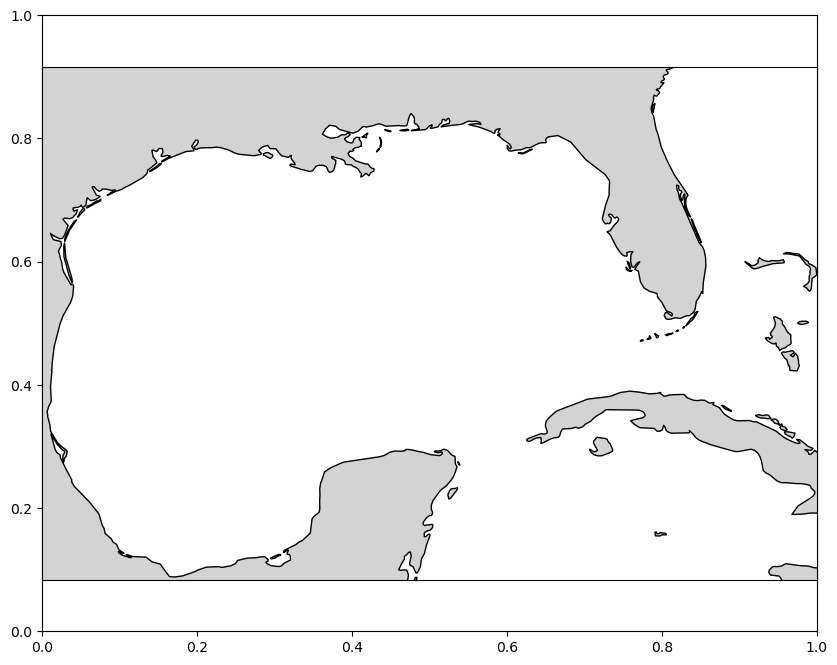

In [39]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-77.04000092,-98, 18.0916481,31.96064758] ) 
#ax.set_extent([]) #play around later

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

Now let's add some data

In [85]:
# what does our data look like again?
gom_data.water_temp[0,0,:,:]

<xarray.DataArray 'water_temp' (Latitude: 385, Longitude: 525)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
    Depth      float32 0.0
    MT         float64 4.33e+04
    Date       float64 ...
Attributes:
    standard_name:  sea_water_temperature
    long_name:        temp [02.0H]
    units:          degC
    valid_range:    [ 3.5286276 32.705715 ]

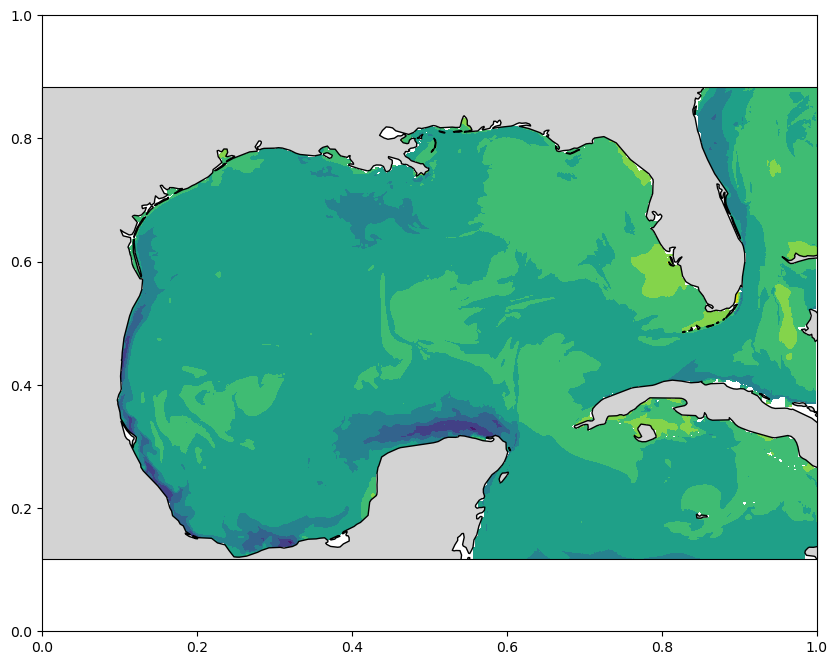

In [41]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var = gom_data.water_temp[0,0,:,:]

#Contours the data on tho the map projection
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call
    

Now I'm going to take a bunch of features from Victoria's demo (in github as Hycom-CartopyDemo) and add them in to make a publication ready plot

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


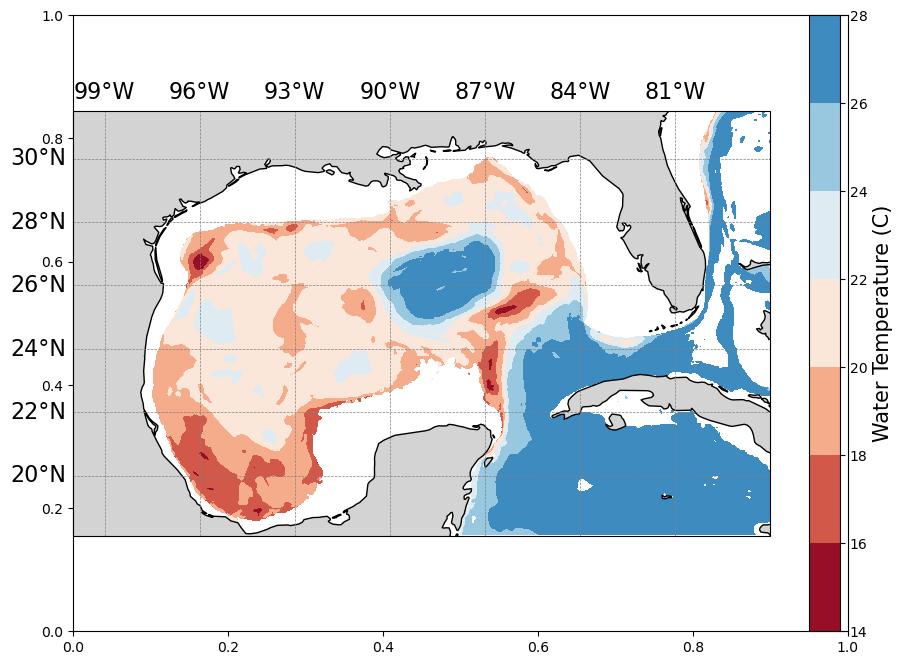

In [71]:
fig, ax = plt.subplots(figsize =(10,8))  
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([260,282, 18.11, 31.5]) 

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='lightgrey')
ax.add_feature(land_50m)

# let's fill in the following:
x = gom_data.Longitude
y = gom_data.Latitude
var = gom_data.water_temp[0,19,:,:]

#Contours the data on tho the map projection
step = np.arange(14,30,2)  
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap = 'RdBu', 
                vmin = 14,vmax = 30,levels = step) # projection is needed in every plot call
    
# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='vertical', pad=0.05, fraction=0.05)
cbar.set_label("Water Temperature" +' (C)', size = 15)


# ##Set formats. ex. x and y labels, and how to set up the x and y labels, and label font size
#     #and sets the grid lines on the graph
# ##Set the grid lines to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')
gl.xlabels_top = True    
gl.ylabels_left = True
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size' : 16}
gl.ylabel_style = {'size' : 16}

## Lab 6.2

**E.0** Finish Lab 6.1 if you haven't already.

**E.1** Complete Introduction to Data Visualization with Matplotlib Chapters 3-4. Let me know if this feels like a good pace

**E.2** Make notes for yourself on progamming tecniques and commands you learned in the lecture and datacamp chapter above, including examples, comments and explainitory text. You can do this here or in a separate notebook that you link to here. Basically, you are making a cheat sheet for yourself.

In [ ]:
##stacking data in bars
# Add bars for "Gold" with the label "Gold"
ax.bar(medals.index, medals['Gold'], label= 'Gold')

# Stack bars for "Silver" on top with label "Silver"
ax.bar(medals.index, medals['Silver'], bottom= medals['Gold'], label= 'Silver')

# Stack bars for "Bronze" on top of that with label "Bronze"
ax.bar(medals.index, medals['Bronze'], bottom= medals['Gold'] + medals['Silver'], label= 'Bronze')

## Display the legend
ax.legend()

plt.show()

In [ ]:
## Adjusting the bins in the histogram and adding labels
fig, ax = plt.subplots()

# Plot a histogram of "Weight" for mens_rowing
ax.hist(mens_rowing['Weight'], histtype = 'step', bins = 5, label = 'Rowing')

# Compare to histogram of "Weight" for mens_gymnastics
ax.hist(mens_gymnastics['Weight'], histtype = 'step', bins = 5, label = 'Gymnastics')

ax.set_xlabel("Weight (kg)")
ax.set_ylabel("# of observations")

# Add the legend and show the Figure
ax.legend()
plt.show()

In [ ]:
## Adding error bars examples in box plots
fig, ax = plt.subplots()

# Add a boxplot for the "Height" column in the DataFrames
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])

# Add x-axis tick labels:
ax.set_xticklabels(['Rowing', 'Gymnastics'])

# Add a y-axis label
ax.set_ylabel('Height (cm)')

plt.show()

### Adding error bars examples in a bar plot using yerr
fig, ax = plt.subplots()

# Add a bar for the rowing "Height" column mean/std
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())

# Add a bar for the gymnastics "Height" column mean/std
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(), yerr=mens_gymnastics['Height'].std())

# Label the y-axis
ax.set_ylabel('Height (cm)')

plt.show()


In [ ]:
## Using a variable as color for the points with c=
fig, ax = plt.subplots()

# Add data: "co2", "relative_temp" as x-y, index as color
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c= climate_change.index)

# Set the x-axis label to "CO2 (ppm)"
ax.set_xlabel('CO2 (ppm)')

# Set the y-axis label to "Relative temperature (C)"
ax.set_ylabel('Relative temperature (C)')

plt.show()

In [ ]:
##set plot style 
plt.set.style('style_name')

##set figure size
fig.set_size_inches([5,3])  #widht and hheight 

## save a figure as png or jpg
fig.savefig('name_figure.png or .jpg', quality = 50, dpi = 300) #set quality between 1-100 and dpi

**E.3** Make a plot of a different variable for the HYCOM data. Play around with colormaps and contourlines to make it your own. Post your plot on the class slack #random channel

In [86]:
#Evaluating salinity
gom_data.salinity[0,0,:,:]

<xarray.DataArray 'salinity' (Latitude: 385, Longitude: 525)>
[202125 values with dtype=float32]
Coordinates:
  * Longitude  (Longitude) float32 -98.0 -97.96 -97.92 ... -77.12 -77.08 -77.04
  * Latitude   (Latitude) float32 18.09 18.13 18.17 18.21 ... 31.89 31.93 31.96
    Depth      float32 0.0
    MT         float64 4.33e+04
    Date       float64 ...
Attributes:
    standard_name:  sea_water_salinity
    long_name:      salinity [02.0H]
    units:          psu
    valid_range:    [ 0.36249864 40.746696  ]

C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '
C:\Users\Mariam Valladares\.conda\envs\myclone\Lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


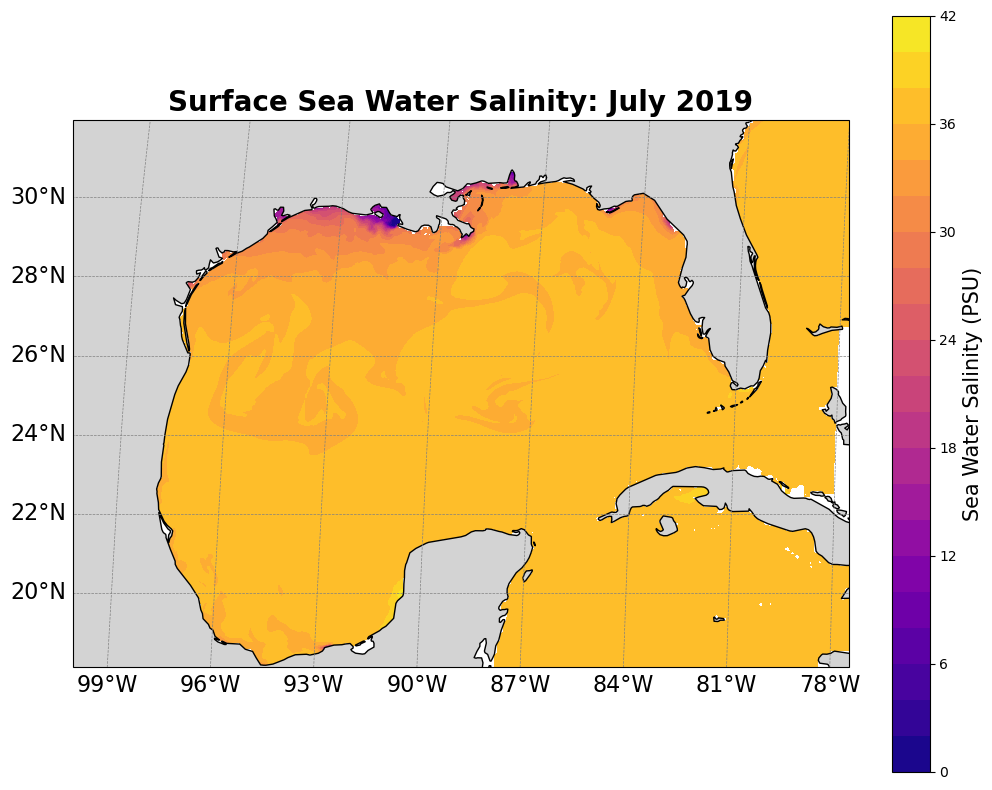

In [160]:
# Create a figure with a specific projection and size
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60)))

# Set the map extent
ax.set_extent([260, 282, 18.11, 31.5])

# Set the title of the map
ax.set_title('Surface Sea Water Salinity: July 2019', fontsize=20, fontweight='bold')

# Add land feature with appropriate style
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                         edgecolor='black', facecolor='lightgray')
ax.add_feature(land_50m)

# Extract longitude, latitude, and salinity data
x = gom_data.Longitude
y = gom_data.Latitude
var = gom_data.salinity[0, 0, :, :]

# Create contour plot with filled contours
step = np.arange(0, 43, 2)
p = ax.contourf(x, y, var, transform=ccrs.PlateCarree(), cmap='plasma', 
                 vmin=0, vmax=43, levels=step)

# Create a colorbar with appropriate labeling
cbar = plt.colorbar(p, ax=ax, orientation='vertical', pad=0.05, fraction=0.05)
cbar.set_label("Sea Water Salinity (PSU)", fontsize=15)

# Add gridlines with formatting
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', linestyle='--')
gl.xlabels_top = False  # Turn off top x-labels
gl.ylabels_left = True   # Show y-labels on the left
gl.ylabels_right = False   # Turn off y-labels on the left
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

# Improve layout to avoid clipping of titles and labels
plt.tight_layout()

# Show the map
plt.show()

### This week's project:

**E.4** Download some data from the ISIMIP data archive (https://data.isimip.org/) and plot it using cartopy. ISIMIP provides bias-corrected data for past and future climate simulations used for impacts studies world wide. Let's start with some maximum atmospheric surface temperature data in the historical period (1850-2014 for CMIP6). We want climate forcing data for ISIMIP3b, which are the lastest (CMIP6) climate projections. 

* https://data.isimip.org/search/tree/ISIMIP3b/InputData/climate/
* Click atmopsheric forcing
* Click GFDL... This is one of NOAA-GFDL's climate models (ESM4)
* Click historical

All of the variable names are in CMIP lingo. Sadly, there is no easy cheat sheet. But you want tas, which is "temperature of air at surface". Let's use the tasmax, the maximum daily surface air temperature
* Click tasmax
* Click files to see all the available files.
  
Here you have a choice, you can download an etire file (note the size) or you can use the "configure download" button, which has subsetting by space or country, as well as time opitons. You can click on a file name to see more info.
* Click on "download file" for the 1851-1860 file. Just grab the whole file, it will take a minute to download.
* Load up the data into xarray and plot the maximum of this dataset (so max over the decade for each gridcell. You just use a max function for this, no loops needed).
* Plot using cartopy to make it pretty. Put some sensible lables on it, etc. Maybe add some country boundaries.

In [90]:
#Read data 1851-1860
file_path= "C:/Users/Mariam Valladares/Dropbox/PC/Desktop/Aplicaciones/LSU Courses/Fall 2024/OCS 4001.1/Labs/Lab 6.2/gfdl-esm4_r1i1p1f1_w5e5_historical_tasmax_global_daily_1851_1860.nc"
isimip_1850 = xr.open_dataset(file_path, decode_times=False)

In [91]:
isimip_1850

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 3653)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.65e+03 3.651e+03 3.652e+03
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...

In [106]:
# get the max values
isimip1851_max = isimip_1850.max(dim='time')
isimip1851_max

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 274.9 274.9 274.9 274.9 ... 258.2 258.3 258.3

In [107]:
#Save to netcdf
isimip1851_max.to_netcdf('isimip1851_max.nc')

### Create the figure 1851-1860

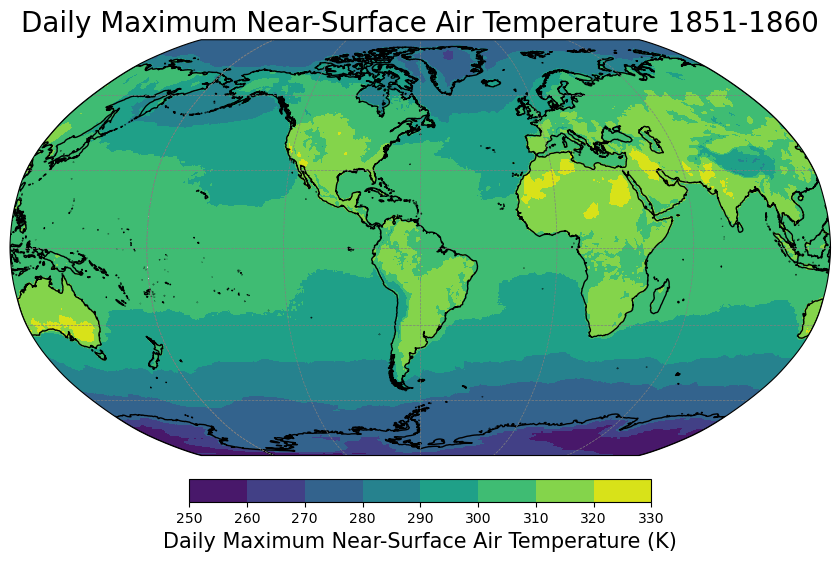

In [161]:

#testing the Robinson projection

fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60)))  
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_title('Daily Maximum Near-Surface Air Temperature 1851-1860', size = 20)

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = isimip1851_max.lon
y = isimip1851_max.lat
var = isimip1851_max.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Daily Maximum Near-Surface Air Temperature' +' (K)', size = 15)

# ##Set the grid lines without labels to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')


**E.5** Now make a second plot using ISIMP data for a future climate projection. Following the same steps as above, get the GFDL tasmax data for the future climate scenario SSP3-7.0 (higher emissions scenario) for 2051-2060. Again, calculate the maximum at each gridpoint for this data set. This is the future maximum daily temperature for that decade. Make your plot nice.

In [126]:
#Read data 2051-2060
file_path2= "C:/Users/Mariam Valladares/Dropbox/PC/Desktop/Aplicaciones/LSU Courses/Fall 2024/OCS 4001.1/Labs/Lab 6.2/gfdl-esm4_r1i1p1f1_w5e5_ssp370_tasmax_global_daily_2051_2060.nc"
isimip2050 = xr.open_dataset(file_path2, decode_times=False)

In [127]:
isimip2050

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, time: 3653)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.65e+03 3.651e+03 3.652e+03
Data variables:
    tasmax   (time, lat, lon) float32 ...
Attributes:
    institution:  Potsdam Institute for Climate Impact Research (PIK)
    contact:      ISIMIP cross-sectoral science team <info@isimip.org> <https...
    references:   Lange (2019) <https://doi.org/10.5194/gmd-12-3055-2019> and...
    title:        ISIMIP3b bias-adjusted climate input data
    project:      Inter-Sectoral Impact Model Intercomparison Project phase 3...
    summary:      CMIP6 daily output data bias-adjusted and statistically dow...

In [128]:
# get the max values
isimip2050_max = isimip2050.max(dim='time')
isimip2050_max

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 275.3 275.3 275.4 275.3 ... 255.0 255.3 255.0

In [129]:
#Save to netcdf
isimip2050_max.to_netcdf('isimip2050_max.nc')

### Create the figure 2051-2060

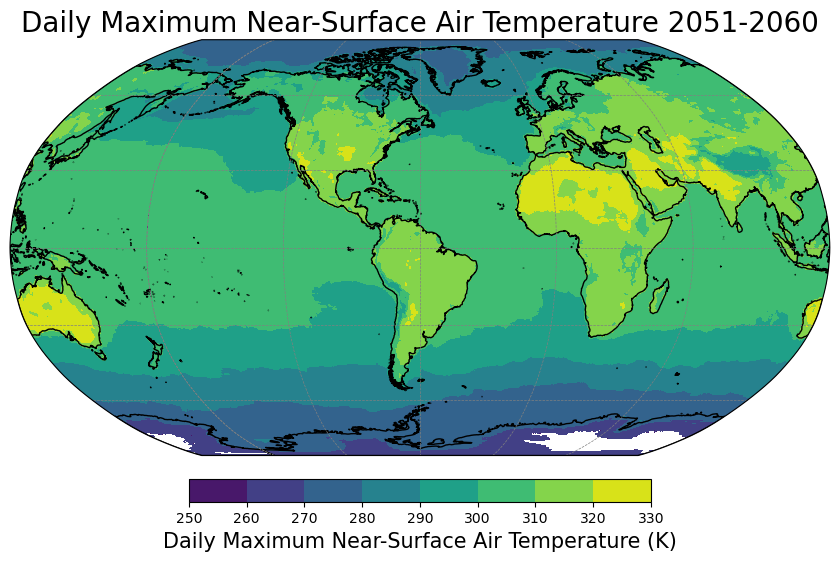

In [162]:

fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60)))  
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_title('Daily Maximum Near-Surface Air Temperature 2051-2060', size = 20)

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = isimip2050_max.lon
y = isimip2050_max.lat
var = isimip2050_max.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree()) # projection is needed in every plot call

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Daily Maximum Near-Surface Air Temperature' +' (K)', size = 15)

# ##Set the grid lines without labels to another variable so it edits the grid variables and not the whole map
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

**E.6** Now plot the anomaly between the two, 2050's - 1850's. Use a diverging colormap (light in the middle), centered on zero. What is the outlook for your country of orgin? Answer in full sentances with specific numbers.

In [133]:
## Estimate the anomaly
anomaly2051_1851 = isimip2050_max - isimip1851_max
anomaly2051_1851

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360)
Coordinates:
  * lon      (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float64 89.75 89.25 88.75 88.25 ... -88.75 -89.25 -89.75
Data variables:
    tasmax   (lat, lon) float32 0.4561 0.4357 0.4763 ... -3.239 -2.983 -3.259

### Create the figure Anomaly 2050-1851

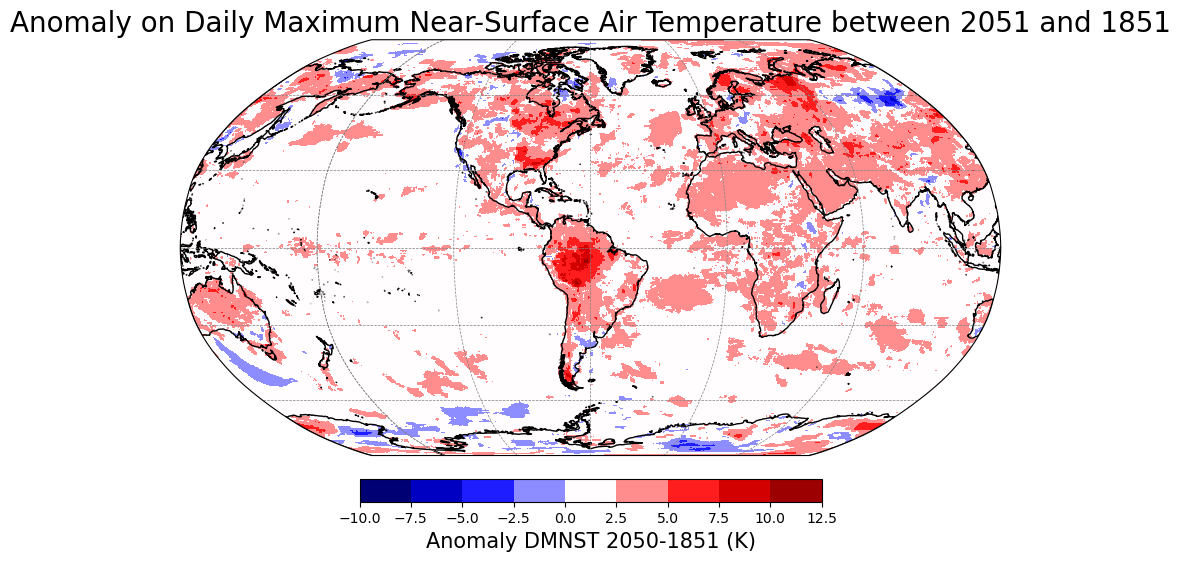

In [163]:
fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.Robinson(central_longitude=-60)))  
#ax = plt.axes(projection=ccrs.Robinson(central_longitude=-60))
ax.set_title('Anomaly on Daily Maximum Near-Surface Air Temperature between 2051 and 1851', size = 20)

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                    edgecolor='black',
                                    facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = anomaly2051_1851.lon
y = anomaly2051_1851.lat
var = anomaly2051_1851.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap='seismic')

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Anomaly DMNST 2050-1851' +' (K)', size = 15)

# ##Set the grid lines without labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

### Zoom in to Honduras

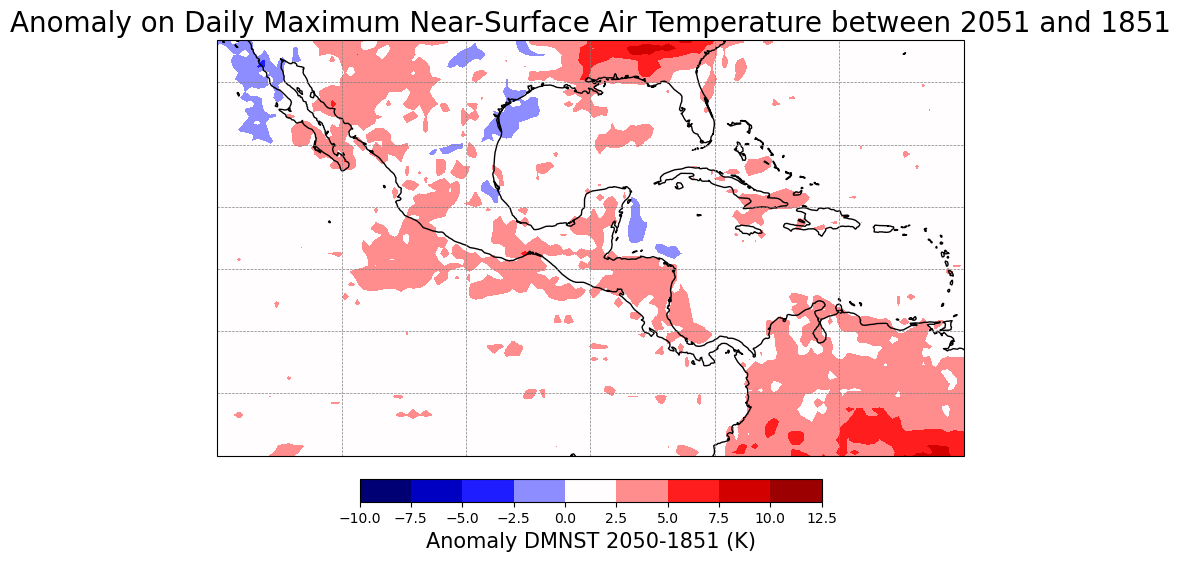

In [164]:
#Zoom in to Honduras
#Create the figure Anomaly 2050-1851

fig, ax = plt.subplots(figsize =(13,6), subplot_kw=dict(projection=ccrs.PlateCarree()))  
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title('Anomaly on Daily Maximum Near-Surface Air Temperature between 2051 and 1851', size = 20)
ax.set_extent([-120,-60, 0, 30]) ##zoom into Honduras

#Sets the land onto the projection with the right color and scale
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',
                                        edgecolor='black',
                                        facecolor='none')
ax.add_feature(land_50m)

# let's fill in the following:
x = anomaly2051_1851.lon
y = anomaly2051_1851.lat
var = anomaly2051_1851.tasmax
p = ax.contourf(x, y,var, transform=ccrs.PlateCarree(), cmap='seismic')

# #Creates colorbar based on the contour 
cbar = plt.colorbar( p, orientation='horizontal', pad=0.05, fraction=0.05)
cbar.set_label('Anomaly DMNST 2050-1851' +' (K)', size = 15)

# ##Set the grid lines without labels
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
           linewidth=.5, color='gray', linestyle='--')

**Outlook for Honduras** The anomaly between 2051 and 1851 indicates that the Daily Maximum Near-Surface Air Temperature in Honduras is expected to rise by between 2.5 and 5.0 K degrees.

**E.7** How could you potentially use this kind of data (future climate projections) in your research? Do some brainstorming. Write down your thoughts here.

**Answer E.7** I believe I can incorporate future climate projections into my research to understand how anticipated climate changes will impact the supply of ecosystem services. For instance, I could use this information in my nutrient retention capacity model to analyze how shifts in precipitation and temperature will influence vegetation's ability to retain nutrients.